### Evaluation of Climate Classifier over full, 0.95 and 0.99 datasets:

### FULL

In [18]:
import pandas as pd
from sklearn.metrics import classification_report


# File paths
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated"

Iteration_1 = f"{BASE_PATH}/Labeled_Posts_16_04.json" #Initial annotation phase
Iteration_2 = f"{BASE_PATH}/Labeled_Posts_23_04.json" # Second annotation phase after having agreed on guidelines

full_path = f"{Iteration_2}/manual_labels_fullsample_full.json"
abel_path = f"{Iteration_2}/manual_labels_fullsample_abel.json"
tobias_path = f"{Iteration_2}/manual_labels_fullsample_tobias.json"

# Load data
df_full = pd.read_json(full_path)
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Join on 'seq' to align labels
df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

# Normalize for comparison
df_abel["annotation"] = df_abel["annotation"].str.lower()
df_abel["label"] = df_abel["label"].str.lower()
df_tobias["annotation"] = df_tobias["annotation"].str.lower()
df_tobias["label"] = df_tobias["label"].str.lower()

# Filter to valid yes/no


# Compare each
print("Evaluation: Abel vs Model")
print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

print("\nEvaluation: Tobias vs Model")
print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


FileNotFoundError: File /Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated/Labeled_Posts_23_04.json/manual_labels_fullsample_full.json does not exist

In [17]:
len(df_tobias)

99

In [19]:
bad_rows = df_tobias[~df_tobias["annotation"].isin(["yes", "no"])]
print(bad_rows)

Empty DataFrame
Columns: [repo, seq, text, timestamp, cid, uri, annotation, label]
Index: []


### 0.95 Dataset

In [26]:
import pandas as pd
from sklearn.metrics import classification_report

# File paths
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated"
full_path = f"{BASE_PATH}/manual_labels_score95_full.json"
abel_path = f"{BASE_PATH}/manual_labels_score95_abel.json"
tobias_path = f"{BASE_PATH}/manual_labels_score95_tobias.json"

# Load data
df_full = pd.read_json(full_path)
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Join on 'seq' to get model label into each DataFrame
df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

# Normalize and filter to valid labels
for df in [df_abel, df_tobias]:
    df["annotation"] = df["annotation"].str.lower()
    df["label"] = df["label"].str.lower()
    df.dropna(subset=["annotation", "label"], inplace=True)
    df = df[df["annotation"].isin(["yes", "no"]) & df["label"].isin(["yes", "no"])]

# Evaluation
print("Evaluation: Abel vs Model (score95)")
print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

print("\nEvaluation: Tobias vs Model (score95)")
print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


Evaluation: Abel vs Model (score95)
              precision    recall  f1-score   support

          no      1.000     0.811     0.896        37
         yes      0.650     1.000     0.788        13

    accuracy                          0.860        50
   macro avg      0.825     0.905     0.842        50
weighted avg      0.909     0.860     0.868        50


Evaluation: Tobias vs Model (score95)
              precision    recall  f1-score   support

          no      0.950     0.594     0.731        32
         yes      0.567     0.944     0.708        18

    accuracy                          0.720        50
   macro avg      0.758     0.769     0.720        50
weighted avg      0.812     0.720     0.723        50



In [25]:
import pandas as pd
from sklearn.metrics import classification_report

# File paths
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated"
full_path = f"{BASE_PATH}/manual_labels_score99_full.json"
abel_path = f"{BASE_PATH}/manual_labels_score99_abel.json"
tobias_path = f"{BASE_PATH}/manual_labels_score99_tobias.json"

# Load data
df_full = pd.read_json(full_path)
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Join on 'seq' to get model label into each DataFrame
df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

# Normalize and filter to valid labels
for df in [df_abel, df_tobias]:
    df["annotation"] = df["annotation"].str.lower()
    df["label"] = df["label"].str.lower()
    df.dropna(subset=["annotation", "label"], inplace=True)
    df = df[df["annotation"].isin(["yes", "no"]) & df["label"].isin(["yes", "no"])]

# Evaluation
print("Evaluation: Abel vs Model (score99)")
print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

print("\nEvaluation: Tobias vs Model (score99)")
print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


Evaluation: Abel vs Model (score99)
              precision    recall  f1-score   support

          no      1.000     0.909     0.952        33
         yes      0.850     1.000     0.919        17

    accuracy                          0.940        50
   macro avg      0.925     0.955     0.936        50
weighted avg      0.949     0.940     0.941        50


Evaluation: Tobias vs Model (score99)
              precision    recall  f1-score   support

          no      1.000     0.800     0.889        25
         yes      0.833     1.000     0.909        25

    accuracy                          0.900        50
   macro avg      0.917     0.900     0.899        50
weighted avg      0.917     0.900     0.899        50



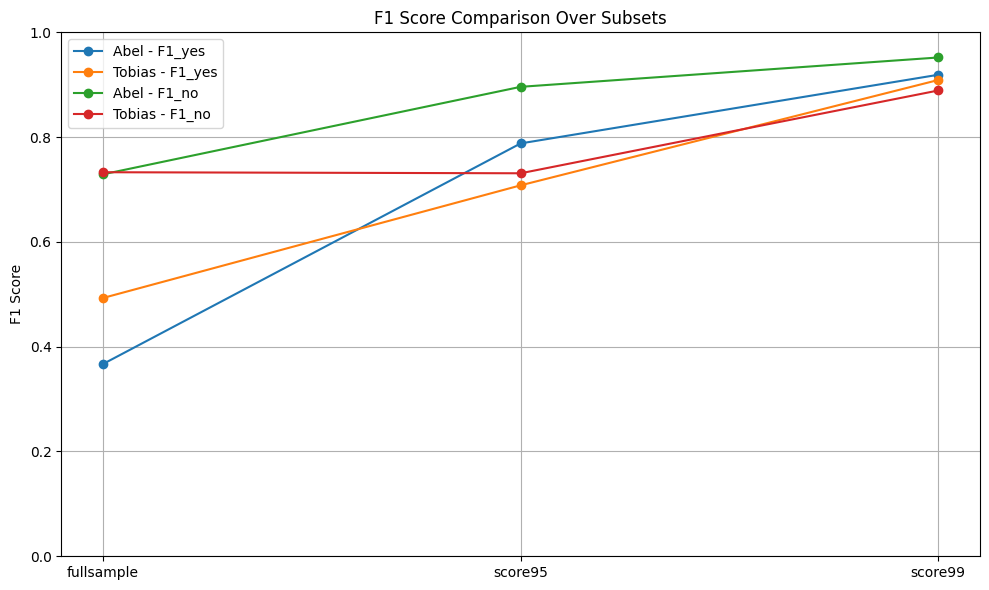

In [34]:
# Updated scores from user input
data = [
    {"Annotator": "Abel", "Subset": "fullsample", "F1_yes": 0.367, "F1_no": 0.729, "Accuracy": 0.620},
    {"Annotator": "Tobias", "Subset": "fullsample", "F1_yes": 0.493, "F1_no": 0.733, "Accuracy": 0.650},
    {"Annotator": "Abel", "Subset": "score95", "F1_yes": 0.788, "F1_no": 0.896, "Accuracy": 0.860},
    {"Annotator": "Tobias", "Subset": "score95", "F1_yes": 0.708, "F1_no": 0.731, "Accuracy": 0.720},
    {"Annotator": "Abel", "Subset": "score99", "F1_yes": 0.919, "F1_no": 0.952, "Accuracy": 0.940},
    {"Annotator": "Tobias", "Subset": "score99", "F1_yes": 0.909, "F1_no": 0.889, "Accuracy": 0.900},
]

df = pd.DataFrame(data)

# Plot F1 scores
fig, ax = plt.subplots(figsize=(10, 6))

for label in ["F1_yes", "F1_no"]:
    for annotator in df["Annotator"].unique():
        subset_data = df[df["Annotator"] == annotator]
        ax.plot(subset_data["Subset"], subset_data[label], marker='o', label=f"{annotator} - {label}")

ax.set_title("F1 Score Comparison Over Subsets")
ax.set_ylabel("F1 Score")
ax.set_ylim(0, 1)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


## Run 2: Evaluation of Climate Classifier using fullsample, 095, 099 scores

### Fullsample

In [20]:
import pandas as pd
from sklearn.metrics import classification_report

def evaluate_subset(name, base_path):
    print(f"\n{'='*60}")
    print(f"Evaluation for: {name}")

    # Load data
    full_path = f"{base_path}_full.json"
    abel_path = f"{base_path}_abel.json"
    tobias_path = f"{base_path}_tobias.json"

    df_full = pd.read_json(full_path)
    df_abel = pd.read_json(abel_path)
    df_tobias = pd.read_json(tobias_path)

    # Merge model labels into annotator data
    df_abel = df_abel.merge(df_full[["seq", "label"]], on="seq", how="inner")
    df_tobias = df_tobias.merge(df_full[["seq", "label"]], on="seq", how="inner")

    # Normalize and filter
    for df in [df_abel, df_tobias]:
        df["annotation"] = df["annotation"].str.lower()
        df["label"] = df["label"].str.lower()
        df.dropna(subset=["annotation", "label"], inplace=True)
        df.drop(df[~df["annotation"].isin(["yes", "no"]) | ~df["label"].isin(["yes", "no"])].index, inplace=True)

    # Evaluation reports
    print("\nAbel vs Model:")
    print(classification_report(df_abel["annotation"], df_abel["label"], digits=3, zero_division=0))

    print("Tobias vs Model:")
    print(classification_report(df_tobias["annotation"], df_tobias["label"], digits=3, zero_division=0))


# Define paths
BASE_DIR = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated/Labeled_Posts_23_04"

evaluate_subset("Fullsample", f"{BASE_DIR}/manual_labels_fullsample")
evaluate_subset("Score ≥ 0.95", f"{BASE_DIR}/manual_labels_score95")
evaluate_subset("Score ≥ 0.99", f"{BASE_DIR}/manual_labels_score99")



Evaluation for: Fullsample

Abel vs Model:
              precision    recall  f1-score   support

          no      1.000     0.548     0.708        93
         yes      0.125     1.000     0.222         6

    accuracy                          0.576        99
   macro avg      0.562     0.774     0.465        99
weighted avg      0.947     0.576     0.679        99

Tobias vs Model:
              precision    recall  f1-score   support

          no      1.000     0.527     0.691        91
         yes      0.157     1.000     0.271         8

    accuracy                          0.566        99
   macro avg      0.578     0.764     0.481        99
weighted avg      0.932     0.566     0.657        99


Evaluation for: Score ≥ 0.95

Abel vs Model:
              precision    recall  f1-score   support

          no      1.000     0.667     0.800        45
         yes      0.250     1.000     0.400         5

    accuracy                          0.700        50
   macro avg      0.6

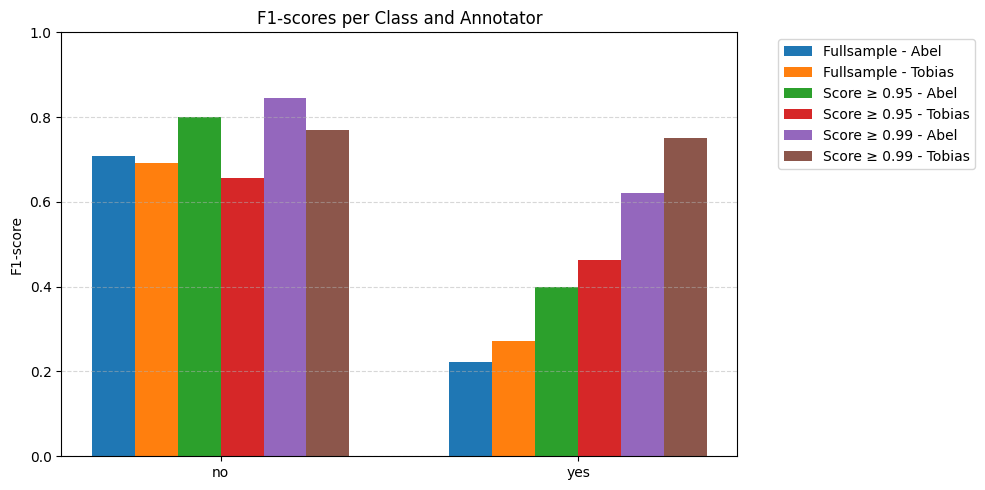

In [22]:
import matplotlib.pyplot as plt

# F1-scores from evaluation results (redeclared after reset)
labels = ["no", "yes"]

# F1-scores for each set (Abel and Tobias)
f1_scores = {
    "Fullsample - Abel": [0.708, 0.222],
    "Fullsample - Tobias": [0.691, 0.271],
    "Score ≥ 0.95 - Abel": [0.800, 0.400],
    "Score ≥ 0.95 - Tobias": [0.656, 0.462],
    "Score ≥ 0.99 - Abel": [0.845, 0.621],
    "Score ≥ 0.99 - Tobias": [0.769, 0.750],
}

# Plot grouped bar chart
x = range(len(labels))
bar_width = 0.12
fig, ax = plt.subplots(figsize=(10, 5))

for i, (label, scores) in enumerate(f1_scores.items()):
    ax.bar(
        [pos + i * bar_width for pos in x],
        scores,
        bar_width,
        label=label
    )

# Axis settings
ax.set_ylabel('F1-score')
ax.set_title('F1-scores per Class and Annotator')
ax.set_xticks([pos + (len(f1_scores) / 2 - 0.5) * bar_width for pos in x])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


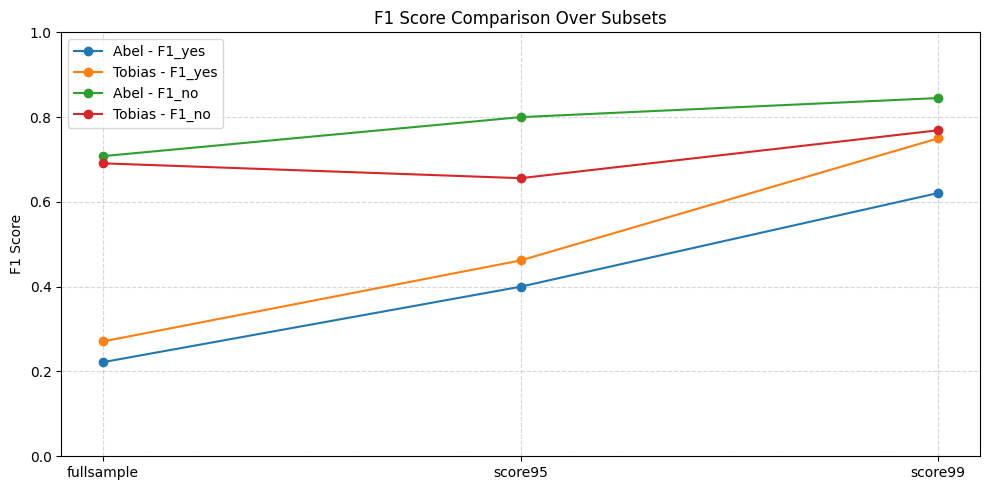

In [23]:
import matplotlib.pyplot as plt

# Subset labels
subsets = ["fullsample", "score95", "score99"]

# F1-scores over subsets
f1_data = {
    "Abel - F1_yes": [0.222, 0.400, 0.621],
    "Tobias - F1_yes": [0.271, 0.462, 0.750],
    "Abel - F1_no": [0.708, 0.800, 0.845],
    "Tobias - F1_no": [0.691, 0.656, 0.769],
}

# Plot
plt.figure(figsize=(10, 5))
for label, scores in f1_data.items():
    plt.plot(subsets, scores, marker='o', label=label)

plt.title("F1 Score Comparison Over Subsets")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Run 2: Looking at Inter-Agreement 

In [16]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# File paths for inter-agreement annotations
BASE_PATH = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated/Labeled_Posts_23_04/Inter-agreement"
abel_path = f"{BASE_PATH}/manual_labels_score99_INTERAGREEMENT_ABEL.json"
tobias_path = f"{BASE_PATH}/manual_labels_score99_INTERAGREEMENT_TOBIAS.json"

# Load annotations
df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Normalize annotations
df_abel["annotation"] = df_abel["annotation"].str.lower()
df_tobias["annotation"] = df_tobias["annotation"].str.lower()

# Filter to 'yes'/'no' only
df_abel = df_abel[df_abel["annotation"].isin(["yes", "no"])]
df_tobias = df_tobias[df_tobias["annotation"].isin(["yes", "no"])]

# Merge on 'seq' to align annotations
df_merged = pd.merge(df_abel[["seq", "annotation"]], df_tobias[["seq", "annotation"]], on="seq", suffixes=("_abel", "_tobias"))

# Summary stats
print(f"Total posts compared: {len(df_merged)}")
exact_matches = (df_merged["annotation_abel"] == df_merged["annotation_tobias"]).sum()
print(f"Exact matches: {exact_matches} ({exact_matches / len(df_merged) * 100:.2f}%)")

# Confusion matrix and report
print("\nConfusion Matrix:")
print(confusion_matrix(df_merged["annotation_abel"], df_merged["annotation_tobias"], labels=["yes", "no"]))

print("\nClassification Report:")
print(classification_report(df_merged["annotation_abel"], df_merged["annotation_tobias"], labels=["yes", "no"], digits=3, zero_division=0))

print(f"\nCohen's Kappa: {cohen_kappa_score(df_merged['annotation_abel'], df_merged['annotation_tobias']):.3f}")


Total posts compared: 50
Exact matches: 49 (98.00%)

Confusion Matrix:
[[17  1]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

         yes      1.000     0.944     0.971        18
          no      0.970     1.000     0.985        32

    accuracy                          0.980        50
   macro avg      0.985     0.972     0.978        50
weighted avg      0.981     0.980     0.980        50


Cohen's Kappa: 0.956


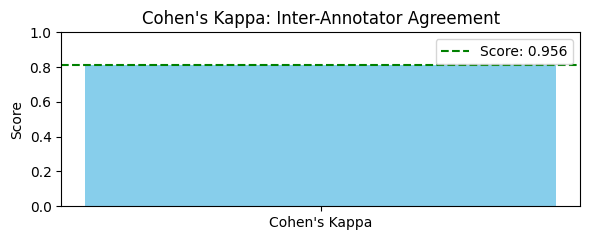

In [17]:
import matplotlib.pyplot as plt

# Cohen's Kappa value from earlier
kappa_value = 0.815

# Plot Cohen's Kappa
plt.figure(figsize=(6, 2.5))
plt.bar(['Cohen\'s Kappa'], [kappa_value], color='skyblue')
plt.ylim(0, 1)
plt.axhline(0.81, color='green', linestyle='--', label='Score: 0.956')
plt.ylabel('Score')
plt.title('Cohen\'s Kappa: Inter-Annotator Agreement')
plt.legend()
plt.tight_layout()
plt.show()


## Disagreements:

In [14]:
import pandas as pd

# Reload Tobias and Abel annotation files
abel_path = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated/Labeled_Posts_23_04/Inter-agreement/manual_labels_score99_INTERAGREEMENT_ABEL.json"
tobias_path = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/processed/annotated/Labeled_Posts_23_04/Inter-agreement/manual_labels_score99_INTERAGREEMENT_TOBIAS.json"

df_abel = pd.read_json(abel_path)
df_tobias = pd.read_json(tobias_path)

# Normalize annotations
df_abel["annotation"] = df_abel["annotation"].str.lower()
df_tobias["annotation"] = df_tobias["annotation"].str.lower()

# Filter valid annotations
df_abel = df_abel[df_abel["annotation"].isin(["yes", "no"])]
df_tobias = df_tobias[df_tobias["annotation"].isin(["yes", "no"])]

# Merge and extract disagreements
df_merged = pd.merge(df_abel[["seq", "annotation"]], df_tobias[["seq", "annotation"]], on="seq", suffixes=("_abel", "_tobias"))
disagreements = df_merged[df_merged["annotation_abel"] != df_merged["annotation_tobias"]]

disagreements

,seq,annotation_abel,annotation_tobias
25,7700421816,yes,no
